In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [24]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/ecg vs r-r values/0-1000.csv")

In [25]:
df.head(1000)

,ECG,Rrvalues
0,-1.3970,0.793
1,-1.3831,0.796
2,-1.3663,0.801
3,-1.3627,0.850
4,-1.3843,0.857
...,...,...
994,-1.3820,0.806
995,-1.3701,0.803
996,-1.3560,0.773
997,-1.3578,0.776


In [26]:
df.describe()

,ECG,Rrvalues
count,999.000000,999.000000
mean,-1.368484,0.808598
std,0.013113,0.046056
min,-1.426100,0.666000
25%,-1.377000,0.778500
50%,-1.369000,0.807000
75%,-1.360400,0.837000
max,-1.264500,0.983000


In [27]:
df.shape

(999, 2)

In [30]:
cdf = df[['ECG','Rrvalues']]
cdf.head(5)

,ECG,Rrvalues
0,-1.3970,0.793
1,-1.3831,0.796
2,-1.3663,0.801
3,-1.3627,0.850
4,-1.3843,0.857


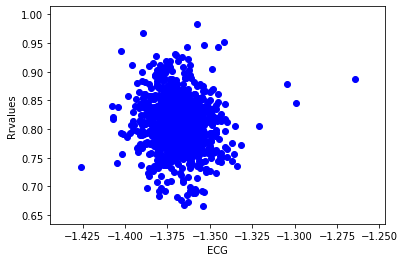

In [31]:
#graph of SNO vs r-r values

plt.scatter(cdf.ECG, cdf.Rrvalues,color='blue')
plt.xlabel('ECG')
plt.ylabel('Rrvalues')
plt.show()

In [32]:
#splitting our data in 80-20 ratio for regression

In [33]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

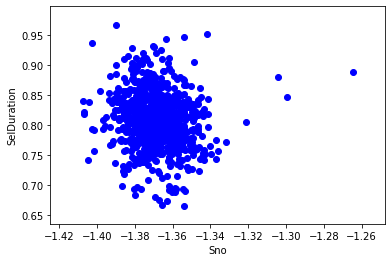

In [35]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.ECG, train.Rrvalues,  color='blue')
plt.xlabel("Sno")
plt.ylabel("SelDuration")
plt.show()

In [37]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ECG']])
train_y = np.asanyarray(train[['Rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.43109218]]
Intercept:  [0.21841089]


Text(0, 0.5, 'SelDuration')

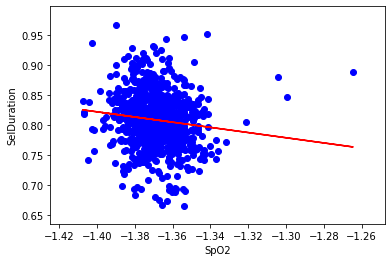

In [38]:
plt.scatter(train.ECG, train.Rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SpO2")
plt.ylabel("SelDuration")

In [39]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ECG']])
test_y = np.asanyarray(test[['Rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -61.97


In [40]:
#using polynomial regression

In [41]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ECG']])
train_y = np.asanyarray(train[['Rrvalues']])

test_x = np.asanyarray(test[['ECG']])
test_y = np.asanyarray(test[['Rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.        , -1.397     ,  1.951609  ],
       [ 1.        , -1.3627    ,  1.85695129],
       [ 1.        , -1.3843    ,  1.91628649],
       ...,
       [ 1.        , -1.382     ,  1.909924  ],
       [ 1.        , -1.3578    ,  1.84362084],
       [ 1.        , -1.3616    ,  1.85395456]])

In [42]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         27.88837486 10.39124826]]
Intercept:  [19.51119764]


Text(0, 0.5, 'Rrvalues')

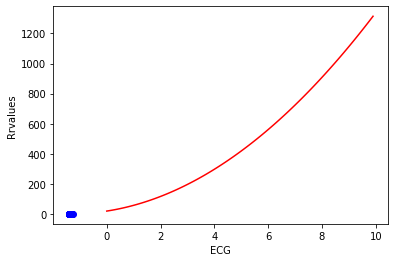

In [43]:
#plotting the polynomial regression
plt.scatter(train.ECG, train.Rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("ECG")
plt.ylabel("Rrvalues")

In [44]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -27.12
